In [79]:
from src.explainer import VGGClassifierExplainer
from src.net import VggNetwork
from src.utils import load_checkpoint
from src.data import CelebaData
from src.explainer.misc_functions import to_image
import matplotlib.pyplot as plt
import tqdm
import torch

In [80]:
net = VggNetwork(out=2)
load_checkpoint(net, "0-net.pth")

Checkpoint loaded: {'epoch': 0} 


{'epoch': 0}

In [81]:
net.features

Sequential(
  (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (1): ReLU(inplace)
  (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (3): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (4): ReLU(inplace)
  (5): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (6): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (7): ReLU(inplace)
  (8): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (9): ReLU(inplace)
  (10): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (11): Conv2d(256, 512, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (12): ReLU(inplace)
  (13): Conv2d(512, 512, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (14): ReLU(inplace)
  (15): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (16): Conv2d(512, 512, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (17)

In [93]:
val_data = CelebaData("data/val.csv")
image, label = val_data[442]
torch.softmax(net(image.unsqueeze(0)), 1)

tensor([[5.3955e-05, 9.9995e-01]], grad_fn=<SoftmaxBackward>)

In [94]:
label

tensor([1])

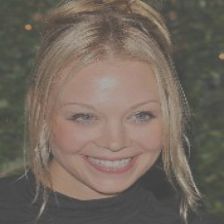

In [95]:
to_image(image)

In [96]:
image.requires_grad = True

In [97]:
explainer = VGGClassifierExplainer(net)

## Heatmap visualisation 

In [98]:
heatmap, him = explainer.heatmap_visualisation(image, target_class=1)

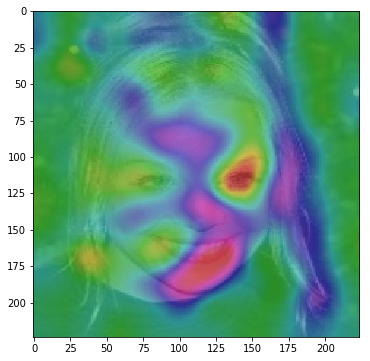

In [99]:
plt.figure(figsize=(6, 6))
plt.imshow(him)

## Smoothed Gradient visualisation 

In [102]:
gradient = explainer.smooth_gradient_visualisation(image, sigma=2, iterations=30)

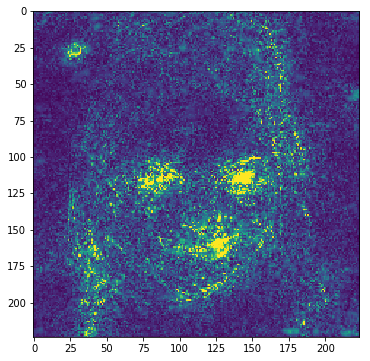

In [103]:
plt.figure(figsize=(6, 6))
plt.imshow(gradient[0])

## Filter patterns visualisation from last convolutional layer

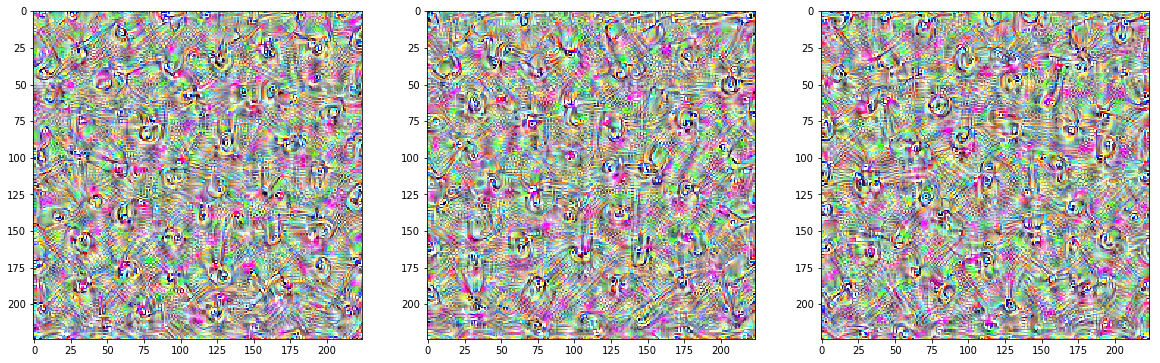

In [104]:
rows, cols = 1, 3
for i in tqdm.tqdm_notebook(range(rows)):
    plt.figure(figsize=(20, 20))
    for c in tqdm.tqdm_notebook(range(1, cols + 1)):
        plt.subplot(1, cols, c)
        filter_patterns = explainer.filter_pattern_visualisation(target_layer=18, target_filter=i*c-1)
        plt.imshow(filter_patterns)
    plt.show()

## Filter actiovation visualisation from last convolutional layer

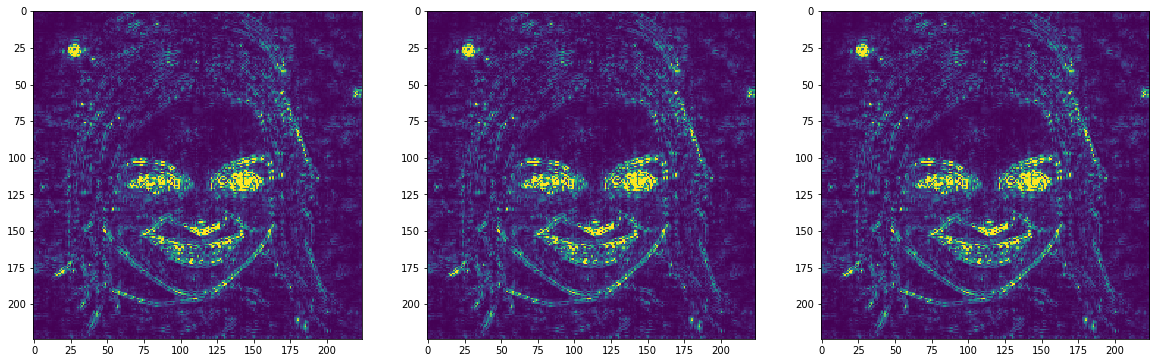

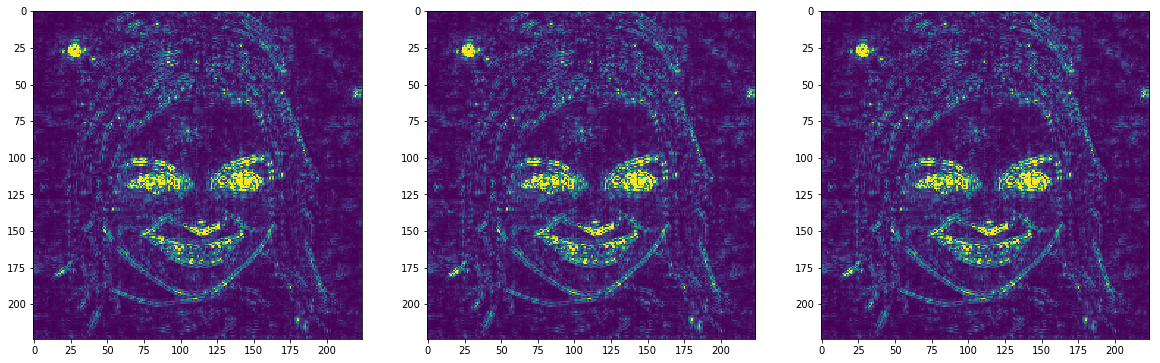

In [105]:
rows, cols = 2, 3
for i in tqdm.tqdm_notebook(range(rows)):
    plt.figure(figsize=(20, 20))
    for c in tqdm.tqdm_notebook(range(1, cols + 1)):
        plt.subplot(1, cols, c)
        filter_patterns = explainer.filter_activation_visualisation(image, target_layer=18, target_filter=i*c-1)
        plt.imshow(filter_patterns[0])
    plt.show()

## Filter actiovation visualisation from first layer

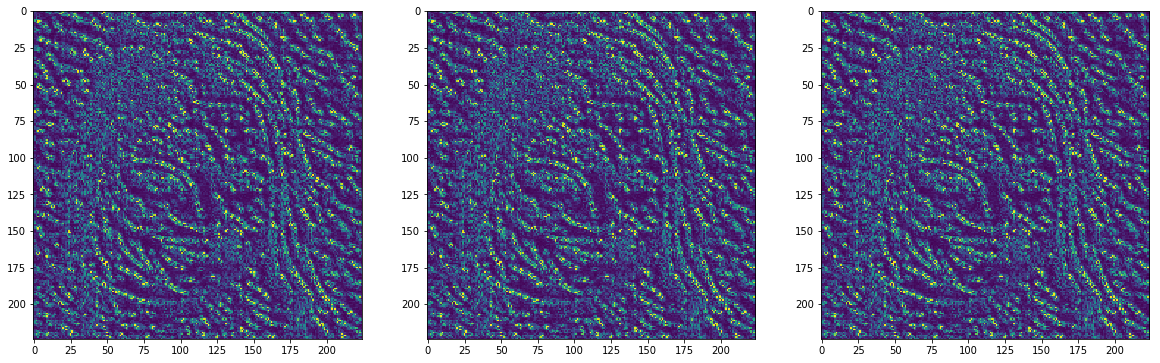

In [108]:
rows, cols = 1, 3
for i in tqdm.tqdm_notebook(range(rows)):
    plt.figure(figsize=(20, 20))
    for c in tqdm.tqdm_notebook(range(1, cols + 1)):
        plt.subplot(1, cols, c)
        filter_patterns = explainer.filter_activation_visualisation(image, target_layer=3, target_filter=i*c-1)
        plt.imshow(filter_patterns[0])
    plt.show()